<a href="https://colab.research.google.com/github/basantiroomie/yolo-ecommerce/blob/main/yolo_eccommerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ultralytics roboflow opencv-python matplotlib seaborn scikit-learn pyyaml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 83.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
# Cell 2: Import all necessary libraries
import os
import yaml
import torch
from ultralytics import YOLO
import cv2
import numpy as np
from roboflow import Roboflow
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

print("All libraries imported successfully!")
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU device: {torch.cuda.get_device_name(0)}")

All libraries imported successfully!
PyTorch version: 2.6.0+cu124
CUDA available: True
GPU device: Tesla T4


In [ ]:
# Cell 3: Configuration - UPDATE YOUR API KEY HERE
ROBOFLOW_API_KEY = "API_KEY"  # Replace with your actual API key
WORKSPACE = "cc-tv-footage-annotation-b10"
PROJECT = "cc-tv-footage-annotation-b10"
VERSION = 1

# Training parameters
MODEL_SIZE = 'yolov8n'  # Options: yolov8n, yolov8s, yolov8m, yolov8l, yolov8x
EPOCHS = 8
IMG_SIZE = 640
BATCH_SIZE = 16
LEARNING_RATE = 0.01
PATIENCE = 10

print("Configuration set!")

Configuration set!


In [ ]:
# Cell 4: Download dataset from Roboflow
def download_dataset(api_key, workspace, project, version, format_type="yolov8"):
    """Download dataset from Roboflow"""
    print("Downloading dataset from Roboflow...")

    rf = Roboflow(api_key=api_key)
    project_obj = rf.workspace(workspace).project(project)
    dataset = project_obj.version(version).download(format_type)

    print(f"Dataset downloaded to: {dataset.location}")
    return dataset.location

# Download the dataset
dataset_path = download_dataset(ROBOFLOW_API_KEY, WORKSPACE, PROJECT, VERSION)
print(f"Dataset path: {dataset_path}")

loading Roboflow workspace...
loading Roboflow project...
Dataset downloaded to: /content/CC-TV-Footage-Annotation-B10-1
Dataset path: /content/CC-TV-Footage-Annotation-B10-1


In [ ]:
# Cell 5: Setup dataset configuration
def setup_dataset_config(dataset_path):
    """Setup dataset configuration for YOLO"""
    config_path = os.path.join(dataset_path, "data.yaml")

    # Read existing config
    with open(config_path, 'r') as f:
        config = yaml.safe_load(f)

    # Update paths to absolute paths
    config['train'] = os.path.join(dataset_path, 'train/images')
    config['val'] = os.path.join(dataset_path, 'valid/images')
    config['test'] = os.path.join(dataset_path, 'test/images')

    # Save updated config
    with open(config_path, 'w') as f:
        yaml.dump(config, f)

    print(f"Dataset configuration updated:")
    print(f"  Classes: {config['names']}")
    print(f"  Number of classes: {config['nc']}")
    print(f"  Train path: {config['train']}")
    print(f"  Val path: {config['val']}")
    print(f"  Test path: {config['test']}")

    return config_path, config

# Setup dataset configuration
config_path, dataset_config = setup_dataset_config(dataset_path)

Dataset configuration updated:
  Classes: ['Customer-Bagpack', 'Product', 'Product-Picked', 'Regular', 'Shoplifting']
  Number of classes: 5
  Train path: /content/CC-TV-Footage-Annotation-B10-1/train/images
  Val path: /content/CC-TV-Footage-Annotation-B10-1/valid/images
  Test path: /content/CC-TV-Footage-Annotation-B10-1/test/images


In [ ]:
# Cell 6: Initialize and train the YOLO model
print(f"Initializing {MODEL_SIZE} model...")
model = YOLO(f'{MODEL_SIZE}.pt')

print("Starting training...")
print(f"Configuration:")
print(f"  Model: {MODEL_SIZE}")
print(f"  Epochs: {EPOCHS}")
print(f"  Image size: {IMG_SIZE}")
print(f"  Batch size: {BATCH_SIZE}")
print(f"  Learning rate: {LEARNING_RATE}")

# Train the model
results = model.train(
    data=config_path,
    epochs=EPOCHS,
    imgsz=IMG_SIZE,
    batch=BATCH_SIZE,
    lr0=LEARNING_RATE,
    patience=PATIENCE,
    save=True,
    plots=True,
    verbose=True
)

print("Training completed!")
print("Training results saved in 'runs/detect/train' folder")

Initializing yolov8n model...
Starting training...
Configuration:
  Model: yolov8n
  Epochs: 8
  Image size: 640
  Batch size: 16
  Learning rate: 0.01
New https://pypi.org/project/ultralytics/8.3.148 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/CC-TV-Footage-Annotation-B10-1/data.yaml, epochs=8, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=T

train: Scanning /content/CC-TV-Footage-Annotation-B10-1/train/labels.cache... 2390 images, 2 backgrounds, 0 corrupt: 100%|██████████| 2390/2390 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



Argument(s) 'quality_lower' are not valid for transform ImageCompression
val: Scanning /content/CC-TV-Footage-Annotation-B10-1/valid/labels.cache... 598 images, 0 backgrounds, 0 corrupt: 100%|██████████| 598/598 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 8 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/8      2.62G      1.866      2.753      1.835         34        640: 100%|██████████| 150/150 [00:45<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  3.08it/s]

                   all        598       1539      0.423      0.335      0.287      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/8       2.2G      1.632      2.023      1.612         20        640: 100%|██████████| 150/150 [00:45<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  3.01it/s]


                   all        598       1539       0.43      0.386      0.393      0.207

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/8      2.19G      1.601      1.859      1.587         34        640: 100%|██████████| 150/150 [00:44<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  3.00it/s]

                   all        598       1539      0.529      0.426      0.457      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/8      2.19G      1.522      1.674      1.534         30        640: 100%|██████████| 150/150 [00:44<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:05<00:00,  3.48it/s]

                   all        598       1539      0.473      0.542      0.545      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/8      2.19G      1.429      1.471      1.458         24        640: 100%|██████████| 150/150 [00:43<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:04<00:00,  3.82it/s]


                   all        598       1539       0.66      0.573      0.602       0.35

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        6/8      2.17G      1.379      1.366      1.432         13        640: 100%|██████████| 150/150 [00:43<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:04<00:00,  3.95it/s]

                   all        598       1539      0.655      0.617       0.66      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        7/8      2.21G      1.311      1.269      1.385         18        640: 100%|██████████| 150/150 [00:45<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:04<00:00,  3.93it/s]


                   all        598       1539      0.619      0.671      0.702      0.452

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        8/8      2.19G       1.24      1.179      1.341         18        640: 100%|██████████| 150/150 [00:42<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:05<00:00,  3.21it/s]


                   all        598       1539      0.699      0.678      0.724      0.477

8 epochs completed in 0.115 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.40 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.23it/s]


                   all        598       1539      0.703      0.676      0.724      0.477
      Customer-Bagpack        187        201      0.865      0.827      0.898      0.553
               Product        154        171      0.713      0.474      0.576      0.318
        Product-Picked        133        145      0.669      0.786      0.797      0.611
               Regular        512        932       0.79      0.876      0.902      0.582
           Shoplifting         84         90      0.478      0.417      0.449      0.321
Speed: 0.3ms preprocess, 2.2ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/detect/train2
Training completed!
Training results saved in 'runs/detect/train' folder


In [ ]:
# Cell 7: Evaluate the trained model
print("Evaluating model performance...")

# Validate model
metrics = model.val()

# Print key metrics
print("\n" + "="*50)
print("MODEL PERFORMANCE METRICS")
print("="*50)
print(f"mAP50 (IoU=0.5): {metrics.box.map50:.4f}")
print(f"mAP50-95 (IoU=0.5:0.95): {metrics.box.map:.4f}")
print(f"Precision: {metrics.box.mp:.4f}")
print(f"Recall: {metrics.box.mr:.4f}")
print(f"F1-Score: {2 * (metrics.box.mp * metrics.box.mr) / (metrics.box.mp + metrics.box.mr):.4f}")
print("="*50)

# Store metrics for later use
model_metrics = {
    'mAP50': metrics.box.map50,
    'mAP50_95': metrics.box.map,
    'precision': metrics.box.mp,
    'recall': metrics.box.mr
}

Evaluating model performance...
Ultralytics 8.3.40 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/CC-TV-Footage-Annotation-B10-1/valid/labels.cache... 598 images, 0 backgrounds, 0 corrupt: 100%|██████████| 598/598 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:08<00:00,  4.33it/s]


                   all        598       1539      0.689      0.692      0.725      0.478
      Customer-Bagpack        187        201      0.862      0.837      0.901      0.557
               Product        154        171      0.682       0.49      0.577      0.317
        Product-Picked        133        145      0.658      0.786      0.797       0.61
               Regular        512        932       0.78      0.878      0.902      0.582
           Shoplifting         84         90      0.464      0.467      0.449      0.321
Speed: 0.3ms preprocess, 4.3ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs/detect/train22

MODEL PERFORMANCE METRICS
mAP50 (IoU=0.5): 0.7252
mAP50-95 (IoU=0.5:0.95): 0.4775
Precision: 0.6893
Recall: 0.6916
F1-Score: 0.6905


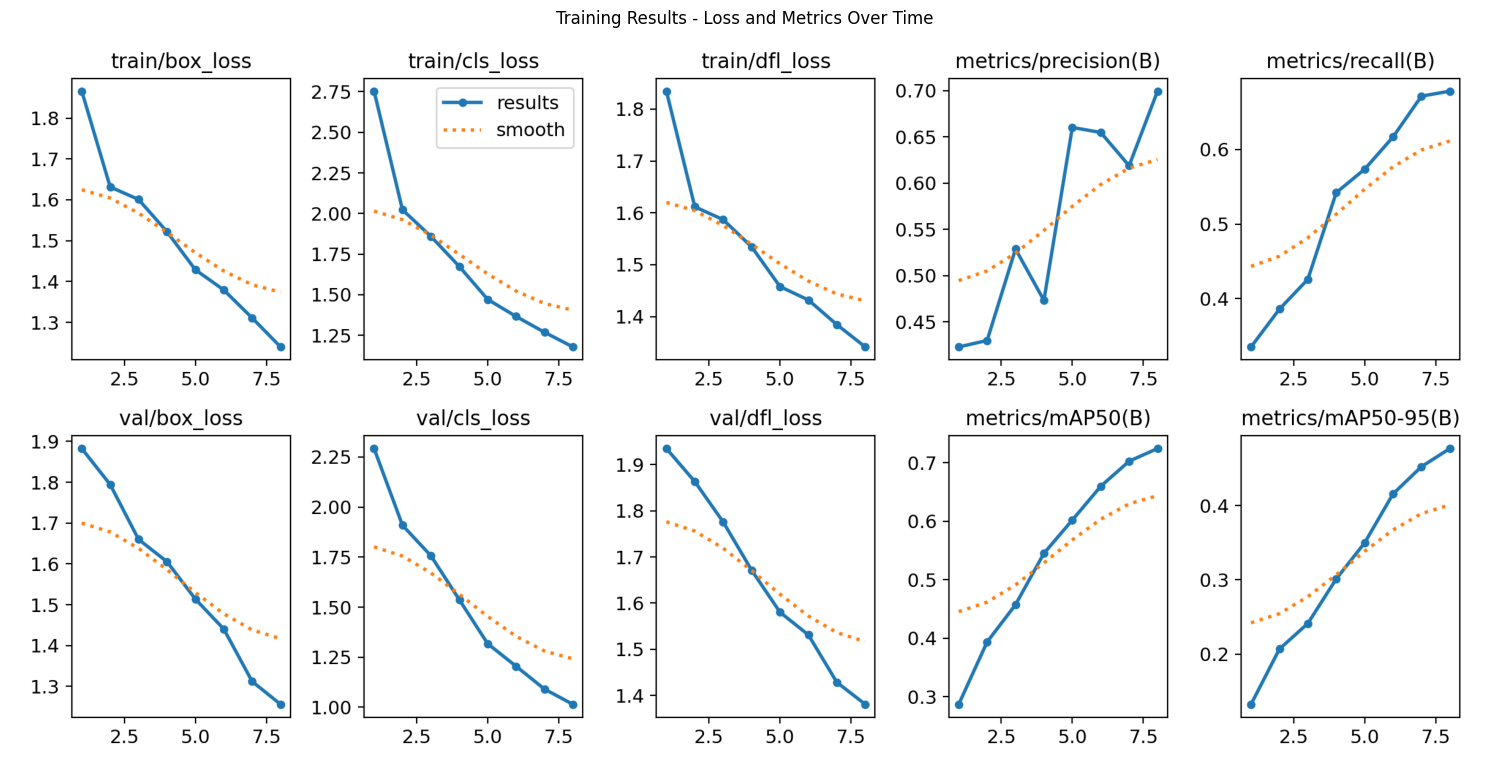

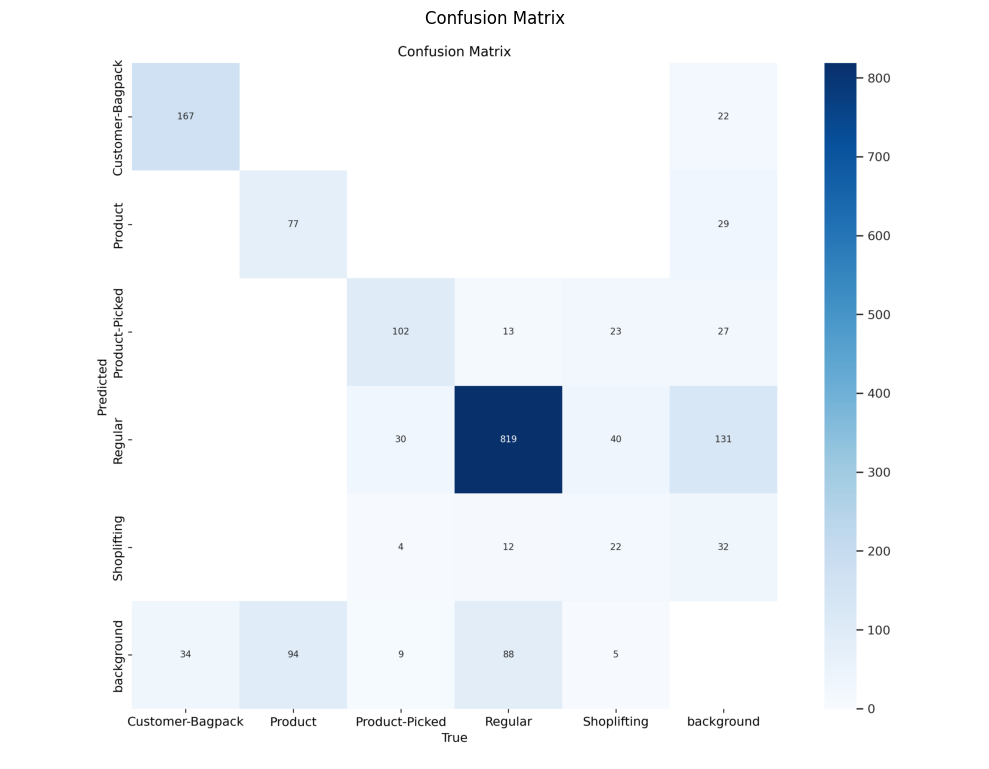

In [ ]:
# Cell 8: Visualize training results
def plot_training_results(results_dir="runs/detect/train2"):
    """Plot training results"""
    results_path = os.path.join(results_dir, "results.png")

    if os.path.exists(results_path):
        img = cv2.imread(results_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(15, 10))
        plt.imshow(img_rgb)
        plt.axis('off')
        plt.title('Training Results - Loss and Metrics Over Time')
        plt.tight_layout()
        plt.show()
    else:
        print(f"Results plot not found at {results_path}")

    # Also plot confusion matrix if available
    confusion_path = os.path.join(results_dir, "confusion_matrix.png")
    if os.path.exists(confusion_path):
        img = cv2.imread(confusion_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(10, 8))
        plt.imshow(img_rgb)
        plt.axis('off')
        plt.title('Confusion Matrix')
        plt.tight_layout()
        plt.show()

# Plot the results
plot_training_results()

Found 598 test images
Predicting on: fShoplifting054_x264_AdobeExpress_102_jpg.rf.a897be7e44cc995c4232dc6705bc4159.jpg

image 1/1 /content/CC-TV-Footage-Annotation-B10-1/valid/images/fShoplifting054_x264_AdobeExpress_102_jpg.rf.a897be7e44cc995c4232dc6705bc4159.jpg: 640x640 1 Product, 1 Product-Picked, 11.0ms
Speed: 3.0ms preprocess, 11.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Found 2 detections:
  1. Product-Picked: 0.686
  2. Product: 0.308


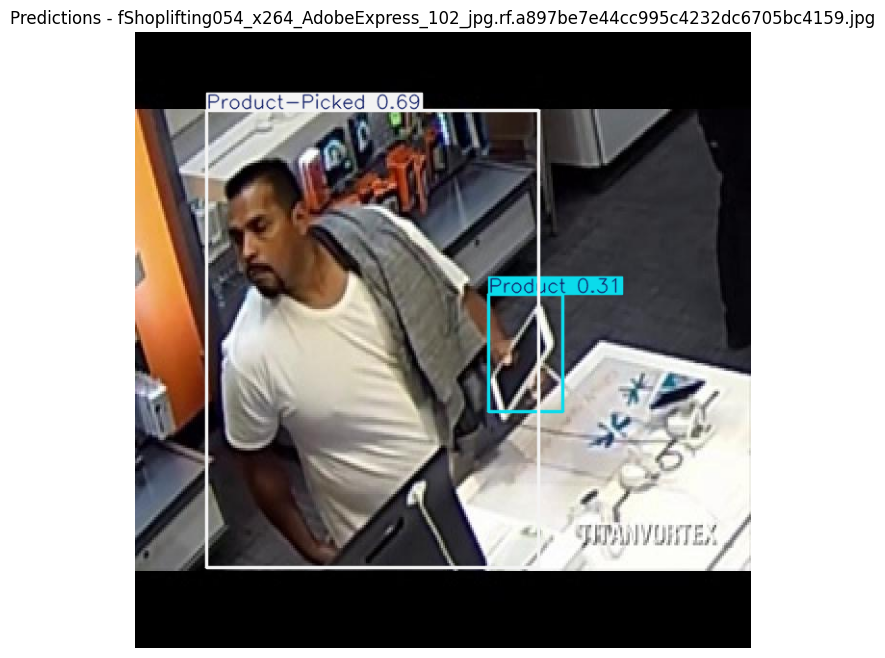

--------------------------------------------------
Predicting on: fShoplifting001_x264_18_18_jpg.rf.fbdbbfeb6183afd6cdbd913c29654b24.jpg

image 1/1 /content/CC-TV-Footage-Annotation-B10-1/valid/images/fShoplifting001_x264_18_18_jpg.rf.fbdbbfeb6183afd6cdbd913c29654b24.jpg: 640x640 1 Regular, 10.3ms
Speed: 3.1ms preprocess, 10.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Found 1 detections:
  1. Regular: 0.559


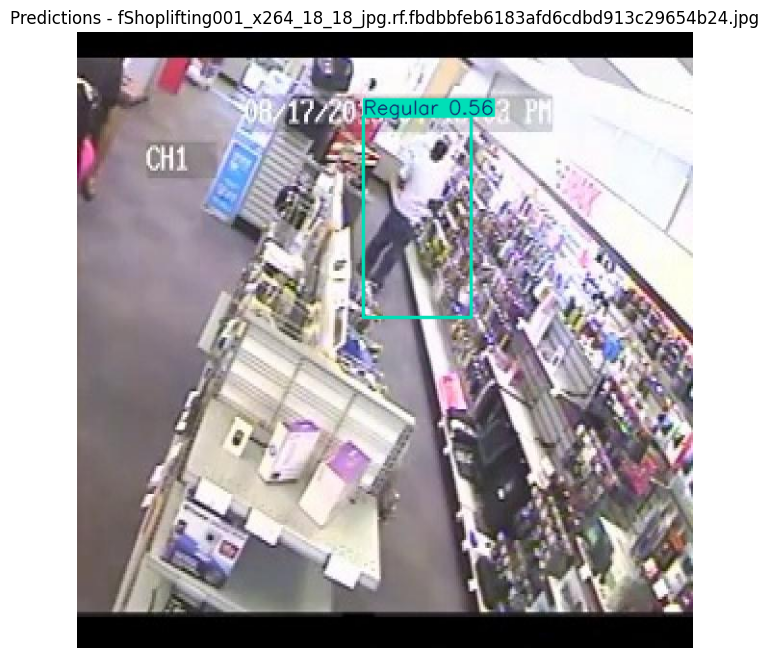

--------------------------------------------------
Predicting on: fShoplifting043_x264_AdobeExpress_102_jpg.rf.a2e4fbcc6e7eb02000f1f0c50ece417e.jpg

image 1/1 /content/CC-TV-Footage-Annotation-B10-1/valid/images/fShoplifting043_x264_AdobeExpress_102_jpg.rf.a2e4fbcc6e7eb02000f1f0c50ece417e.jpg: 640x640 2 Customer-Bagpacks, 2 Products, 1 Product-Picked, 1 Regular, 12.5ms
Speed: 3.3ms preprocess, 12.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Found 6 detections:
  1. Regular: 0.924
  2. Product-Picked: 0.810
  3. Product: 0.390
  4. Customer-Bagpack: 0.382
  5. Customer-Bagpack: 0.255
  6. Product: 0.255


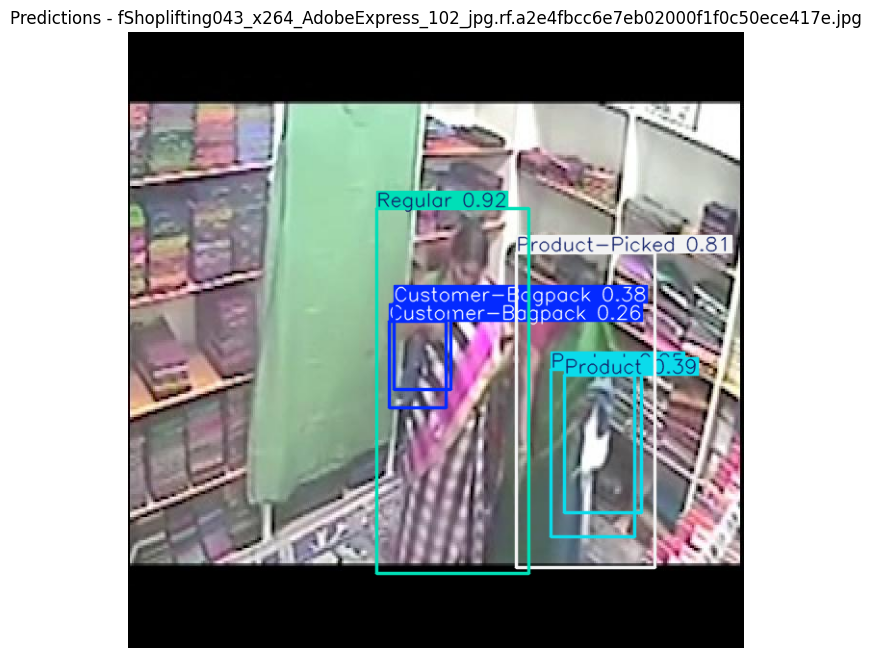

--------------------------------------------------


In [ ]:
# Cell 9: Test predictions on sample images
def predict_and_show(model, image_path, conf_threshold=0.25):
    """Predict on image and display results"""
    print(f"Predicting on: {os.path.basename(image_path)}")

    # Run prediction
    results = model(image_path, conf=conf_threshold)

    # Process results
    for r in results:
        # Get detection info
        boxes = r.boxes
        if boxes is not None and len(boxes) > 0:
            print(f"Found {len(boxes)} detections:")
            for i, box in enumerate(boxes):
                conf = box.conf[0].item()
                cls = int(box.cls[0].item())
                class_name = model.names[cls]
                print(f"  {i+1}. {class_name}: {conf:.3f}")
        else:
            print("No detections found")

        # Display result
        img_with_detections = r.plot()
        img_rgb = cv2.cvtColor(img_with_detections, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(12, 8))
        plt.imshow(img_rgb)
        plt.axis('off')
        plt.title(f'Predictions - {os.path.basename(image_path)}')
        plt.show()

    return results

# Test on sample images from test set
test_img_dir = os.path.join(dataset_path, 'valid', 'images')
if os.path.exists(test_img_dir):
    test_images = [f for f in os.listdir(test_img_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    if test_images:
        print(f"Found {len(test_images)} test images")

        # Test on first few images
        for i, img_name in enumerate(test_images[:3]):  # Test first 3 images
            img_path = os.path.join(test_img_dir, img_name)
            results = predict_and_show(model, img_path, conf_threshold=0.25)
            print("-" * 50)
    else:
        print("No test images found")
else:
    print("Test directory not found")

Processing: /images.jpg

image 1/1 /images.jpg: 448x640 1 Product-Picked, 1 Regular, 47.9ms
Speed: 5.2ms preprocess, 47.9ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)
Detections found: 2
  Detection 1:
    Class: Product-Picked
    Confidence: 0.378
    Coordinates: [130.4, 15.8, 199.2, 165.1]
  Detection 2:
    Class: Regular
    Confidence: 0.310
    Coordinates: [126.6, 17.2, 199.2, 172.0]


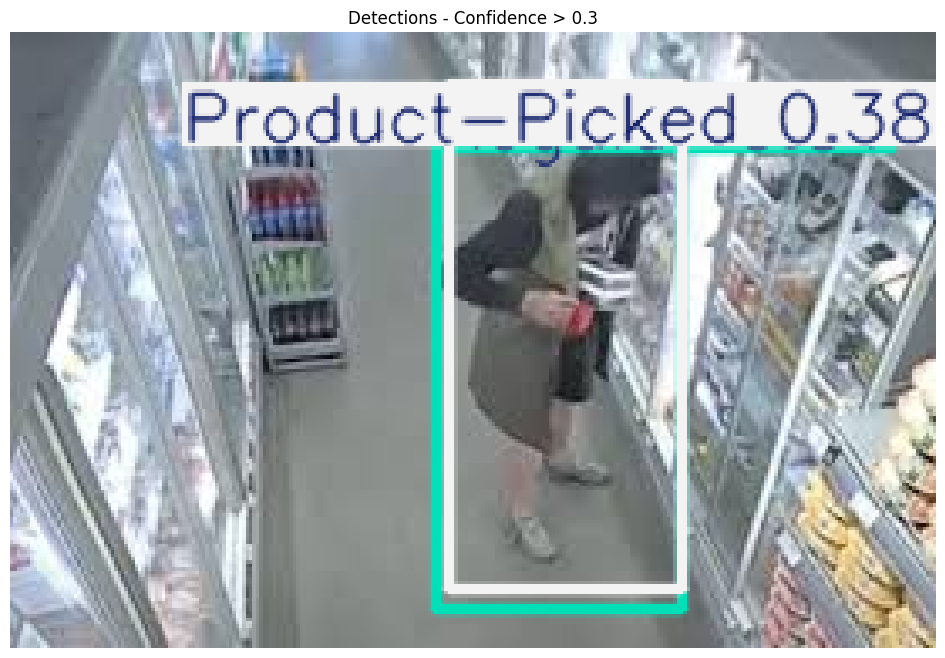

Result saved to: prediction_images.jpg
Prediction function ready!


In [ ]:
# Cell 10: Function to predict on any new image
def predict_single_image(model, image_path, conf_threshold=0.25, save_result=False):
    """
    Predict on a single image

    Args:
        model: Trained YOLO model
        image_path: Path to input image
        conf_threshold: Confidence threshold for predictions
        save_result: Whether to save the result image
    """
    print(f"Processing: {image_path}")

    # Run prediction
    results = model(image_path, conf=conf_threshold)

    # Process and display results
    for r in results:
        boxes = r.boxes
        if boxes is not None and len(boxes) > 0:
            print(f"Detections found: {len(boxes)}")

            # Print detection details
            for i, box in enumerate(boxes):
                conf = box.conf[0].item()
                cls = int(box.cls[0].item())
                class_name = model.names[cls]
                coords = box.xyxy[0].tolist()  # x1, y1, x2, y2
                print(f"  Detection {i+1}:")
                print(f"    Class: {class_name}")
                print(f"    Confidence: {conf:.3f}")
                print(f"    Coordinates: [{coords[0]:.1f}, {coords[1]:.1f}, {coords[2]:.1f}, {coords[3]:.1f}]")
        else:
            print("No detections found")

        # Display result
        img_with_detections = r.plot()
        img_rgb = cv2.cvtColor(img_with_detections, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(12, 8))
        plt.imshow(img_rgb)
        plt.axis('off')
        plt.title(f'Detections - Confidence > {conf_threshold}')
        plt.show()

        # Save result if requested
        if save_result:
            output_path = f"prediction_{os.path.basename(image_path)}"
            cv2.imwrite(output_path, img_with_detections)
            print(f"Result saved to: {output_path}")

    return results

# Example usage - replace with your image path
image_path = "/images.jpg"
results = predict_single_image(model, image_path, conf_threshold=0.3, save_result=True)

print("Prediction function ready!")


In [ ]:
# Cell 11: Save and export the trained model
print("Saving trained model...")

# The model is automatically saved during training in runs/detect/train/weights/
best_model_path = "runs/detect/train/weights/best.pt"
last_model_path = "runs/detect/train/weights/last.pt"

print(f"Best model saved at: {best_model_path}")
print(f"Last model saved at: {last_model_path}")

# Export model to different formats for deployment
try:
    print("Exporting model to ONNX format...")
    onnx_path = model.export(format='onnx')
    print(f"ONNX model saved at: {onnx_path}")
except Exception as e:
    print(f"ONNX export failed: {e}")

try:
    print("Exporting model to TensorRT format...")
    trt_path = model.export(format='engine')
    print(f"TensorRT model saved at: {trt_path}")
except Exception as e:
    print(f"TensorRT export failed: {e}")

# Save model summary
print("\nModel Summary:")
print(f"Model: {MODEL_SIZE}")
print(f"Classes: {list(model.names.values())}")
print(f"Number of classes: {len(model.names)}")
print(f"Final mAP50: {model_metrics['mAP50']:.4f}")
print(f"Final Precision: {model_metrics['precision']:.4f}")
print(f"Final Recall: {model_metrics['recall']:.4f}")

print("\nTraining completed successfully!")

Saving trained model...
Best model saved at: runs/detect/train/weights/best.pt
Last model saved at: runs/detect/train/weights/last.pt
Exporting model to ONNX format...
Ultralytics 8.3.40 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)

PyTorch: starting from 'runs/detect/train2/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 9, 8400) (6.0 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 306.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.2/146.2 kB 308.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.2/283.2 MB 237.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 172.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 233.4 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 17.3s, installed 3 packages: ['onnx>=1.12.0', 'onn